## Loading the data and other imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import joblib
from scipy.stats import chi2_contingency

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_excel('cinnamon_Qulity_Dataset.xlsx')

## Exploratory Data Analysis

In [6]:
df.shape

(160, 10)

In [7]:
df.head()

,Sample_ID,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),pH_Level,Eugenol (%),Quality_Label
0,H001,10.56,5.93,1.24,0.28,0.002,0.002,4.82,68.47,High
1,H002,11.43,5.60,1.35,0.25,0.002,0.004,4.87,72.38,High
2,H003,11.10,5.70,1.21,0.37,0.001,0.003,5.07,69.52,High
3,H004,10.90,5.76,1.47,0.27,0.001,0.004,4.85,67.25,High
4,H005,10.23,5.82,1.28,0.26,0.001,0.005,6.29,69.52,High


In [8]:
df.tail()

,Sample_ID,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),pH_Level,Eugenol (%),Quality_Label
155,NEW096,9.61,6.67,1.40,0.44,0.001,0.076,5.17,22.13,Low
156,NEW097,11.47,6.60,0.95,0.52,0.002,0.041,5.30,46.13,Medium
157,NEW098,11.88,6.47,1.65,0.25,0.003,0.012,5.57,72.28,High
158,NEW099,11.48,5.45,1.37,0.74,0.003,0.006,6.34,69.95,High
159,NEW100,12.95,6.01,1.20,0.26,0.001,0.032,5.19,33.77,Low


In [9]:
df.columns

Index(['Sample_ID', 'Moisture (%)', 'Ash (%)', 'Volatile_Oil (%)',
       'Acid_Insoluble_Ash (%)', 'Chromium (mg/kg)', 'Coumarin (mg/kg)',
       'pH_Level', 'Eugenol (%)', 'Quality_Label'],
      dtype='object')

In [10]:
cl = ['Sample_ID', 'Moisture (%)', 'Ash (%)', 'Volatile_Oil (%)',
       'Acid_Insoluble_Ash (%)', 'Chromium (mg/kg)', 'Coumarin (mg/kg)',
       'pH_Level', 'Eugenol (%)', 'Quality_Label']

In [11]:
for i in cl:
    print(f'{i}: {df[i].unique()}')

Sample_ID: ['H001' 'H002' 'H003' 'H004' 'H005' 'H006' 'H007' 'H008' 'H009' 'H010'
 'H011' 'H012' 'H013' 'H014' 'H015' 'H016' 'H017' 'H018' 'H019' 'H020'
 'M001' 'M002' 'M003' 'M004' 'M005' 'M006' 'M007' 'M008' 'M009' 'M010'
 'M011' 'M012' 'M013' 'M014' 'M015' 'M016' 'M017' 'M018' 'M019' 'M020'
 'L001' 'L002' 'L003' 'L004' 'L005' 'L006' 'L007' 'L008' 'L009' 'L010'
 'L011' 'L012' 'L013' 'L014' 'L015' 'L016' 'L017' 'L018' 'L019' 'L020'
 'NEW001' 'NEW002' 'NEW003' 'NEW004' 'NEW005' 'NEW006' 'NEW007' 'NEW008'
 'NEW009' 'NEW010' 'NEW011' 'NEW012' 'NEW013' 'NEW014' 'NEW015' 'NEW016'
 'NEW017' 'NEW018' 'NEW019' 'NEW020' 'NEW021' 'NEW022' 'NEW023' 'NEW024'
 'NEW025' 'NEW026' 'NEW027' 'NEW028' 'NEW029' 'NEW030' 'NEW031' 'NEW032'
 'NEW033' 'NEW034' 'NEW035' 'NEW036' 'NEW037' 'NEW038' 'NEW039' 'NEW040'
 'NEW041' 'NEW042' 'NEW043' 'NEW044' 'NEW045' 'NEW046' 'NEW047' 'NEW048'
 'NEW049' 'NEW050' 'NEW051' 'NEW052' 'NEW053' 'NEW054' 'NEW055' 'NEW056'
 'NEW057' 'NEW058' 'NEW059' 'NEW060' 'NEW061' 'NEW06

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample_ID               160 non-null    object 
 1   Moisture (%)            160 non-null    float64
 2   Ash (%)                 160 non-null    float64
 3   Volatile_Oil (%)        160 non-null    float64
 4   Acid_Insoluble_Ash (%)  160 non-null    float64
 5   Chromium (mg/kg)        160 non-null    float64
 6   Coumarin (mg/kg)        160 non-null    float64
 7   pH_Level                160 non-null    float64
 8   Eugenol (%)             160 non-null    float64
 9   Quality_Label           160 non-null    object 
dtypes: float64(8), object(2)
memory usage: 12.6+ KB


In [13]:
df.describe()

,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),pH_Level,Eugenol (%)
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,11.541500,6.038813,1.435750,0.455250,0.002594,0.028731,5.526875,50.529812
std,1.127754,0.790976,0.538615,0.162952,0.001151,0.028729,0.571095,16.697449
min,9.500000,4.590000,0.610000,0.200000,0.001000,0.001000,4.510000,20.260000
25%,10.627500,5.472500,1.020000,0.330000,0.002000,0.007750,5.017500,35.142500
50%,11.480000,6.045000,1.310000,0.440000,0.002000,0.015000,5.550000,52.225000
75%,12.355000,6.670000,1.907500,0.552500,0.003250,0.046000,6.050000,66.877500
max,13.930000,7.490000,2.480000,0.790000,0.005000,0.100000,6.480000,74.840000


([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

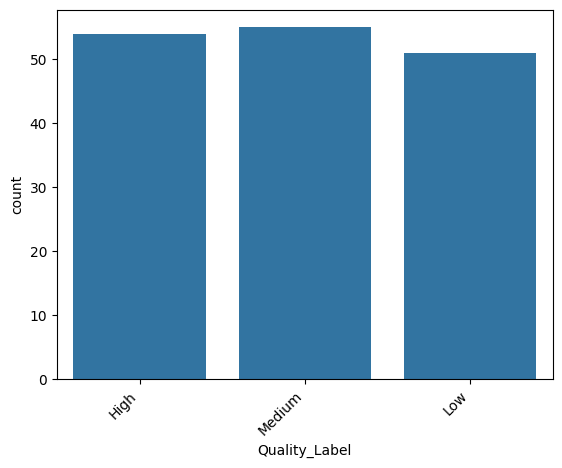

In [14]:
sns.countplot(x='Quality_Label',data=df)
plt.xticks(rotation=45, ha='right')

In [15]:
df.columns

Index(['Sample_ID', 'Moisture (%)', 'Ash (%)', 'Volatile_Oil (%)',
       'Acid_Insoluble_Ash (%)', 'Chromium (mg/kg)', 'Coumarin (mg/kg)',
       'pH_Level', 'Eugenol (%)', 'Quality_Label'],
      dtype='object')

([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

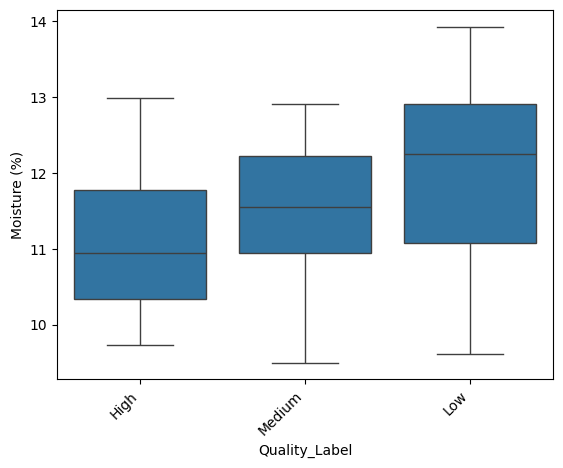

In [16]:
sns.boxplot(x='Quality_Label',y='Moisture (%)',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

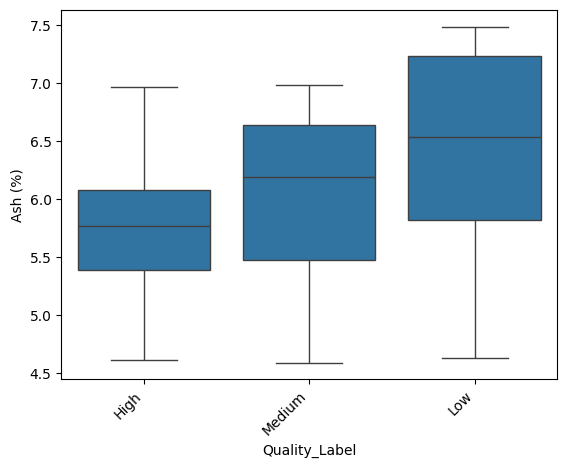

In [18]:
sns.boxplot(x='Quality_Label',y='Ash (%)',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

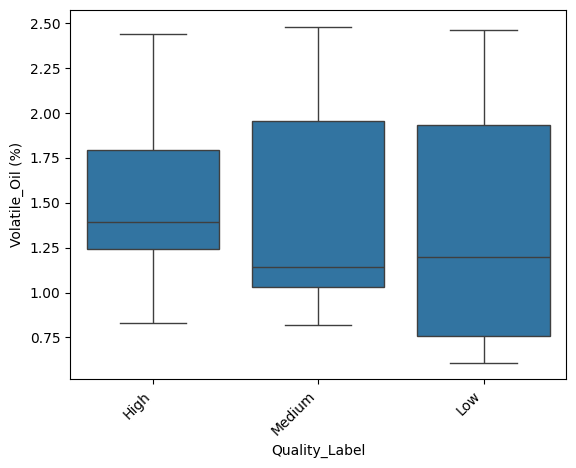

In [20]:
sns.boxplot(x='Quality_Label',y='Volatile_Oil (%)',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

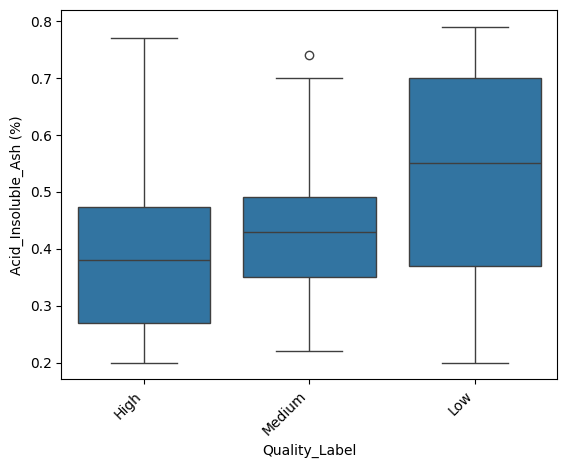

In [21]:
sns.boxplot(x='Quality_Label',y='Acid_Insoluble_Ash (%)',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

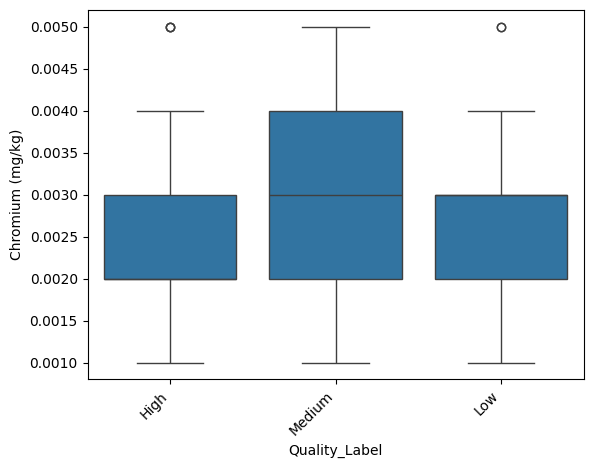

In [22]:
sns.boxplot(x='Quality_Label',y='Chromium (mg/kg)',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

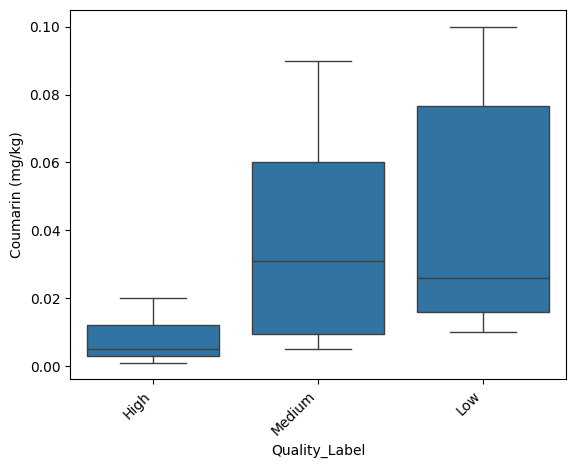

In [23]:
sns.boxplot(x='Quality_Label',y='Coumarin (mg/kg)',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

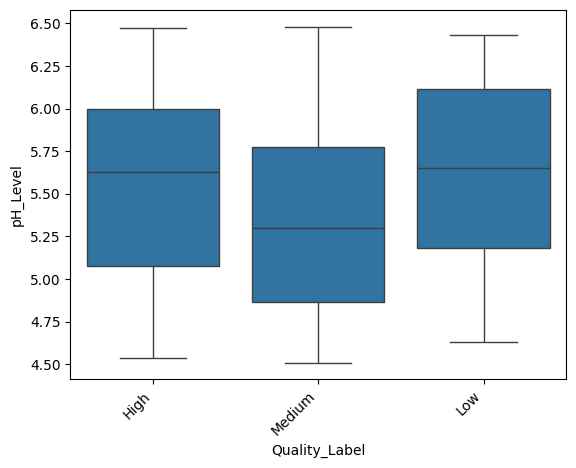

In [24]:
sns.boxplot(x='Quality_Label',y='pH_Level',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

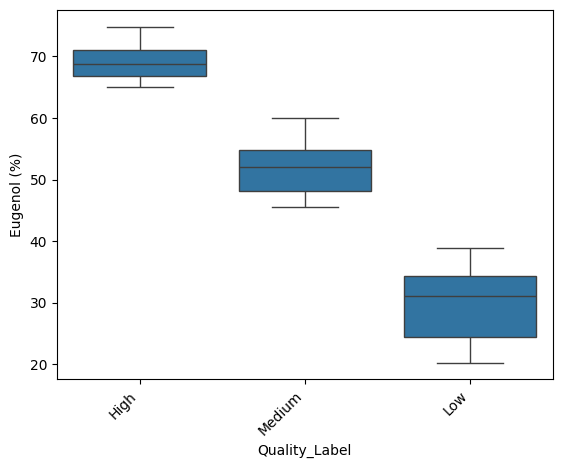

In [25]:
sns.boxplot(x='Quality_Label',y='Eugenol (%)',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2], [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

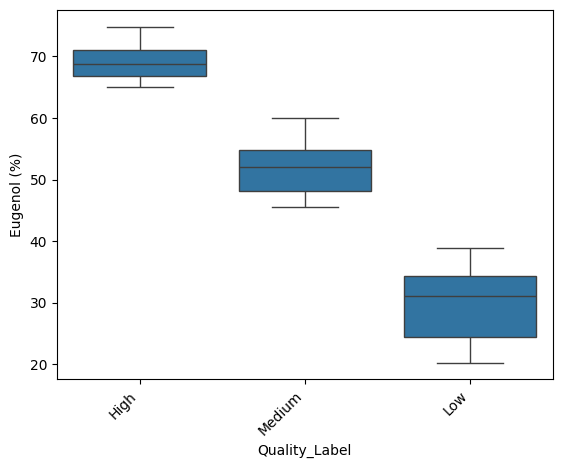

In [26]:
sns.boxplot(x='Quality_Label',y='Eugenol (%)',data=df)
plt.xticks(rotation=45, ha='right')

### analyze the association between each independent variable and the Category

#### categorical features and Category

In [30]:
categorical_features =list(df.select_dtypes(['object']).columns)[:-1]
categorical_features

['Sample_ID']

In [31]:
def cramers_v_and_p(matrix):
    chi2, p, _, _ = chi2_contingency(matrix)
    n = matrix.sum().sum()
    r, k = matrix.shape
    cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    return cramers_v, p

In [33]:
results = []

for features in categorical_features:

    matrix = pd.crosstab(df[features], df['Quality_Label'])
    
    cv, p_value = cramers_v_and_p(matrix)
    results.append((features, cv, p_value))

In [34]:
results_df = pd.DataFrame(results, columns=['categorical features', 'Cramér\'s V', 'p-value'])

In [35]:
results_df['Significant'] = results_df['p-value'] < 0.05

In [36]:
results_df

,categorical features,Cramér's V,p-value,Significant
0,Sample_ID,1.0,0.457964,False


In [38]:
df.drop(['Sample_ID'], axis=1, inplace=True)

In [39]:
categorical_features =list(df.select_dtypes(['object']).columns)[:-1]
categorical_features

[]

#### Numerical features and Category

In [40]:
le = LabelEncoder()
df['Category Encoded'] = le.fit_transform(df['Quality_Label'])

In [41]:
corr_for_numerical = df.drop(categorical_features + ["Quality_Label"], axis=1).corr()
corr_for_numerical

,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),pH_Level,Eugenol (%),Category Encoded
Moisture (%),1.000000,0.405910,-0.288923,0.276567,0.100538,-0.134714,0.030928,-0.338225,0.117596
Ash (%),0.405910,1.000000,-0.304110,0.212372,-0.073354,-0.148742,-0.049609,-0.331206,0.138112
Volatile_Oil (%),-0.288923,-0.304110,1.000000,-0.086508,-0.078797,0.307802,0.008010,0.137453,-0.044507
Acid_Insoluble_Ash (%),0.276567,0.212372,-0.086508,1.000000,0.180133,0.033662,0.158226,-0.331243,0.056628
Chromium (mg/kg),0.100538,-0.073354,-0.078797,0.180133,1.000000,0.180814,-0.082898,-0.088846,0.134691
Coumarin (mg/kg),-0.134714,-0.148742,0.307802,0.033662,0.180814,1.000000,0.047114,-0.443823,0.421285
pH_Level,0.030928,-0.049609,0.008010,0.158226,-0.082898,0.047114,1.000000,-0.070596,-0.130577
Eugenol (%),-0.338225,-0.331206,0.137453,-0.331243,-0.088846,-0.443823,-0.070596,1.000000,-0.427645
Category Encoded,0.117596,0.138112,-0.044507,0.056628,0.134691,0.421285,-0.130577,-0.427645,1.000000


In [42]:
corr_for_numerical["Category Encoded"]

Moisture (%)              0.117596
Ash (%)                   0.138112
Volatile_Oil (%)         -0.044507
Acid_Insoluble_Ash (%)    0.056628
Chromium (mg/kg)          0.134691
Coumarin (mg/kg)          0.421285
pH_Level                 -0.130577
Eugenol (%)              -0.427645
Category Encoded          1.000000
Name: Category Encoded, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Moisture (%)'),
  Text(1, 0, 'Ash (%)'),
  Text(2, 0, 'Volatile_Oil (%)'),
  Text(3, 0, 'Acid_Insoluble_Ash (%)'),
  Text(4, 0, 'Chromium (mg/kg)'),
  Text(5, 0, 'Coumarin (mg/kg)'),
  Text(6, 0, 'pH_Level'),
  Text(7, 0, 'Eugenol (%)'),
  Text(8, 0, 'Category Encoded')])

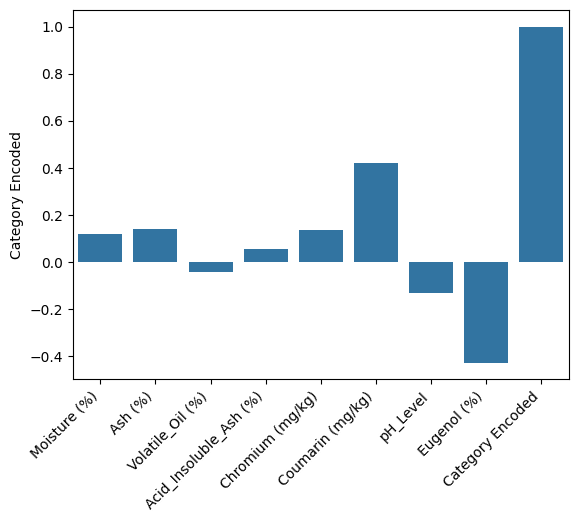

In [44]:
sns.barplot( data=corr_for_numerical["Category Encoded"] )
plt.xticks(rotation=45, ha='right')

In [45]:
df.drop("Category Encoded", axis=1, inplace=True)

In [46]:
df.columns

Index(['Moisture (%)', 'Ash (%)', 'Volatile_Oil (%)', 'Acid_Insoluble_Ash (%)',
       'Chromium (mg/kg)', 'Coumarin (mg/kg)', 'pH_Level', 'Eugenol (%)',
       'Quality_Label'],
      dtype='object')

In [47]:
df.drop(['Volatile_Oil (%)', 'Acid_Insoluble_Ash (%)'], axis=1, inplace=True)

## Data PreProcessing

In [48]:
df.head()

,Moisture (%),Ash (%),Chromium (mg/kg),Coumarin (mg/kg),pH_Level,Eugenol (%),Quality_Label
0,10.56,5.93,0.002,0.002,4.82,68.47,High
1,11.43,5.60,0.002,0.004,4.87,72.38,High
2,11.10,5.70,0.001,0.003,5.07,69.52,High
3,10.90,5.76,0.001,0.004,4.85,67.25,High
4,10.23,5.82,0.001,0.005,6.29,69.52,High


In [49]:
df.isnull().sum()

Moisture (%)        0
Ash (%)             0
Chromium (mg/kg)    0
Coumarin (mg/kg)    0
pH_Level            0
Eugenol (%)         0
Quality_Label       0
dtype: int64

#### split dataset into training and testing sets

In [50]:
X = df.drop("Quality_Label", axis=1)
y = df["Quality_Label"]

#### Train Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Models Training 

In [54]:
df["Quality_Label"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [61]:
classes = ['High', 'Low', 'Medium']

def plot_confusion_matrix(y_true, y_pred, classes, figsize=(6, 4), cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred) 
    
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".2f", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

### SVM

In [56]:
svm_classifier = SVC(kernel='linear')

In [57]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [58]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVM_Accuracy:", accuracy*100)

print(classification_report(y_test, y_pred))

SVM_Accuracy: 100.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        18
         Low       1.00      1.00      1.00        13
      Medium       1.00      1.00      1.00        17

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [59]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVM_Accuracy:", accuracy*100)

print(classification_report(y_test, y_pred))

SVM_Accuracy: 100.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        18
         Low       1.00      1.00      1.00        13
      Medium       1.00      1.00      1.00        17

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



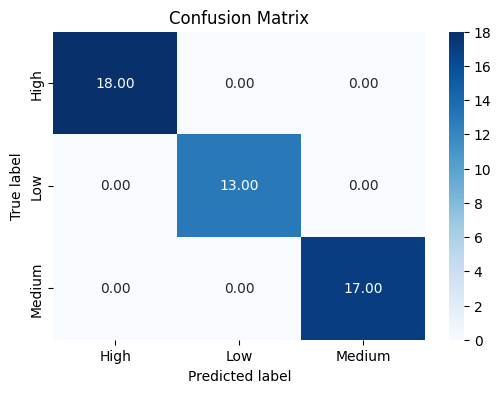

In [62]:
plot_confusion_matrix(y_test, y_pred, classes)

### KNN

In [63]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [64]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
y_pred_knn = knn_classifier.predict(X_test)

In [66]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn*100)


print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 100.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        18
         Low       1.00      1.00      1.00        13
      Medium       1.00      1.00      1.00        17

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [67]:
confusion_matrix(y_test,y_pred_knn)

array([[18,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 17]], dtype=int64)

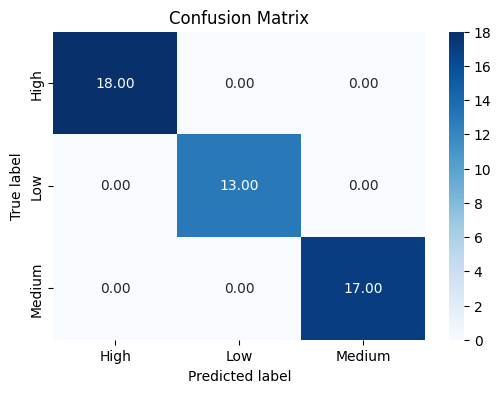

In [68]:
plot_confusion_matrix(y_test, y_pred_knn, classes)

## MLPClassifier

In [69]:
mlp_classifier = MLPClassifier()

In [70]:
mlp_classifier.fit(X_train, y_train)

e:\MR.Mind_Projects\RP025-02\final_backend\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [71]:
y_pred_mlp = mlp_classifier.predict(X_test)

In [72]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLPClassifier Accuracy:", accuracy_mlp*100)

print(classification_report(y_test, y_pred_mlp))

MLPClassifier Accuracy: 100.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        18
         Low       1.00      1.00      1.00        13
      Medium       1.00      1.00      1.00        17

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [73]:
confusion_matrix(y_test,y_pred_mlp)

array([[18,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 17]], dtype=int64)

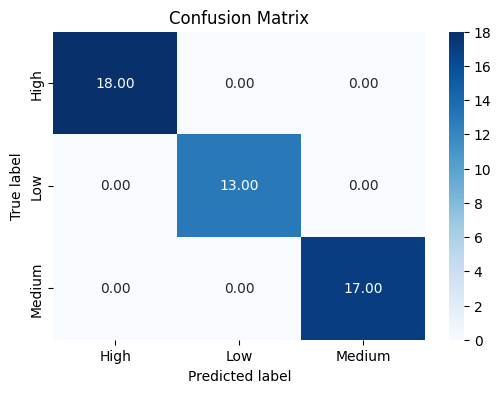

In [74]:
plot_confusion_matrix(y_test, y_pred_mlp, classes)

## Random Forest Classifier

In [75]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [76]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred_rf = rf_classifier.predict(X_test)

In [78]:
accuracy_mlp = accuracy_score(y_test, y_pred_rf)
print("RF_Classifier Accuracy:", accuracy_mlp*100)

print(classification_report(y_test, y_pred_rf))

RF_Classifier Accuracy: 100.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        18
         Low       1.00      1.00      1.00        13
      Medium       1.00      1.00      1.00        17

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [79]:
confusion_matrix(y_test,y_pred_rf)

array([[18,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 17]], dtype=int64)

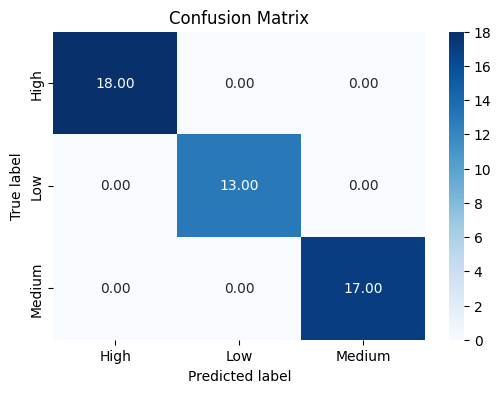

In [80]:
plot_confusion_matrix(y_test, y_pred_rf, classes)

## Save Best Model

In [81]:
with open('RF_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

## check predictions

In [82]:
with open('RF_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [83]:
df.columns

Index(['Moisture (%)', 'Ash (%)', 'Chromium (mg/kg)', 'Coumarin (mg/kg)',
       'pH_Level', 'Eugenol (%)', 'Quality_Label'],
      dtype='object')

In [85]:
def get_prediction(dict):
    y_pred = loaded_model.predict(dict)
    print(y_pred[0])
    # return y_pred

In [95]:
dict_sample1 = {
    'Moisture (%)': 11.0,
    'Ash (%)': 5.7,
    'Chromium (mg/kg)': 0.001,
    'Coumarin (mg/kg)': 0.003,
    'pH_Level': 5.0,
    'Eugenol (%)': 70.0
}

dict_sample2 = {
    'Moisture (%)': 12.0,
    'Ash (%)': 6.5,
    'Chromium (mg/kg)': 0.003,
    'Coumarin (mg/kg)': 0.012,
    'pH_Level': 5.5,
    'Eugenol (%)': 55.0
}

dict_sample3 = {
    'Moisture (%)': 10.0,
    'Ash (%)': 6.7,
    'Chromium (mg/kg)': 0.001,
    'Coumarin (mg/kg)': 0.076,
    'pH_Level': 5.2,
    'Eugenol (%)': 22.0
}

In [96]:
input_df = pd.DataFrame([dict_sample3])

get_prediction(input_df)



Low


In [99]:
example_dict = {
    "moisture": 11.0,
    "ash": 5.7,
    "chromium_mgkg": 0.001,
    "coumarin_mgkg": 0.003,
    "ph_level": 5.0,
    "eugenol": 70.0
}
